In [138]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [139]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# print(df.isnull().sum())
df_numeric = df.select_dtypes("number")
# df.head()

scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)
print(pd.DataFrame(scaled).describe());


                  0             1             2             3             4  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   8.037814e-18  1.607563e-17 -2.813235e-17 -1.607563e-17 -8.037814e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00 -2.363050e+00 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01 -7.706500e-01 -7.200196e-01   
50%    1.131724e-01 -9.385367e-01 -1.531324e-01 -1.192138e-01 -9.084100e-02   
75%    8.005001e-01  1.065488e+00  6.569519e-01  7.493678e-01  5.961931e-01   
max    2.327895e+00  1.065488e+00  3.585718e+00  2.776058e+00  3.235851e+00   

                5           6             7             8             9  
count  442.000000  442.000000  4.420000e+02  4.420000e+02  4.420000e+02  
mean     0.000000    0.000000  1.607563e-17 -8.037814e-18 -1.607563e-17  
std      1.001133    1.001133  1.001133e+00  1.001133e+00  1.00113

In [140]:
pca = PCA(n_components=2)
diabetes_pca = pca.fit_transform(scaled)
(diabetes_pca.shape)

(442, 2)

# B

In [141]:
full_pca = PCA()
scale_full_pca = full_pca.fit(diabetes_pca)
cumulus_variance = np.cumsum(scale_full_pca.explained_variance_)
print(cumulus_variance)
print("80%", np.argmax(cumulus_variance >= 0.8) + 1)

print("90%", np.argmax(cumulus_variance >= 0.9) + 1)

[4.03333594 5.52903957]
80% 1
90% 1


Component	Variance Explained	Cumulative Variance
1				0.4024			0.4024
2				0.1492			0.5517
3				0.1206			0.6722
4				0.0955			0.7678
5				0.0662			0.8340
6				0.0603			0.8943
7				0.0537			0.9479
8				0.0434			0.9913
9				0.0078			0.9991
10				0.0009			1.0000


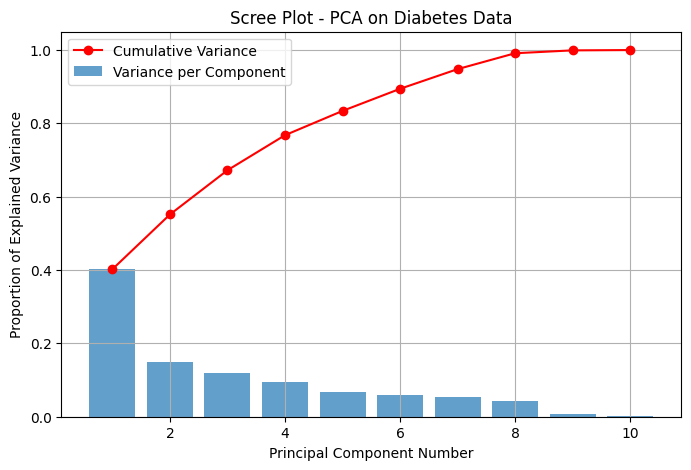


To cover 80% of variance, 5 components are needed.
To cover 90% of variance, 7 components are needed.


In [142]:
# Execute PCA
pca = PCA()
X_pca = pca.fit_transform(scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Display table
print("Component\tVariance Explained\tCumulative Variance")
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"{i}\t\t\t\t{ev:.4f}\t\t\t{cv:.4f}")
# Scree plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Variance per Component')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', label='Cumulative Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Proportion of Explained Variance')
plt.title('Scree Plot - PCA on Diabetes Data')
plt.legend()
plt.grid(True)
plt.show()

# Check number of components needed to cover 80% and 90% of variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nTo cover 80% of variance, {n_components_80} components are needed.")
print(f"To cover 90% of variance, {n_components_90} components are needed.")

# G

In [143]:
loadings = pca.components_.T
feature_names = diabetes.feature_names
loading_df = pd.DataFrame(loadings[:, :3], index=feature_names, columns=["PCA1", "PCA2", "PCA3"])
pca1_abs = np.abs(loading_df["PCA1"]).sort_values(ascending=False)
pca2_abs = np.abs(loading_df["PCA2"]).sort_values(ascending=False)
pca3_abs = np.abs(loading_df["PCA3"]).sort_values(ascending=False)

# pc1_abs = np.abs(loading_df['PC1'])
print(pca1_abs)
print(pca2_abs)
print(pca3_abs)

s4     0.428834
s5     0.378618
s2     0.351861
s1     0.343255
s6     0.322183
bmi    0.303162
s3     0.282437
bp     0.271738
age    0.216431
sex    0.186967
Name: PCA1, dtype: float64
s1     0.573027
s3     0.506239
s2     0.455942
sex    0.386547
bmi    0.156281
bp     0.138266
s6     0.084949
s4     0.068181
age    0.044367
s5     0.026187
Name: PCA2, dtype: float64
bp     0.513571
age    0.494668
s3     0.386032
s4     0.380680
s6     0.276842
s2     0.269689
bmi    0.167527
sex    0.106864
s1     0.068579
s5     0.063630
Name: PCA3, dtype: float64


In [144]:
# # ماتریس بارها (loadings)
# loadings = pca.components_.T  # اندازه: (n_features, n_components)
# feature_names = diabetes.feature_names
# # نمایش بارهای ۲ مؤلفه اول
# print("بارهای مؤلفه اول و دوم:")
# loadings_df = pd.DataFrame(loadings[:, :2], index=feature_names, columns=['PC1', 'PC2'])
# print(loadings_df)
#
# # تفسیر مؤلفه اول: کدام ویژگی‌ها بیشترین وزن را دارند؟
# print("\nویژگی‌های با بیشترین وزن در PC1 (مقدار مطلق):")
# pc1_abs = np.abs(loadings_df['PC1'])
# print(pc1_abs.sort_values(ascending=False))
#
# # نمایش بصری بارهای PC1 و PC2
# plt.figure(figsize=(10, 6))
#
# plt.subplot(1, 2, 1)
# plt.barh(feature_names, loadings_df['PC1'])
# plt.title('بارهای مؤلفه اول (PC1)')
# plt.xlabel('مقدار بار')
# plt.grid(True, axis='x')
#
# plt.subplot(1, 2, 2)
# plt.barh(feature_names, loadings_df['PC2'])
# plt.title('بارهای مؤلفه دوم (PC2)')
# plt.xlabel('مقدار بار')
# plt.grid(True, axis='x')
#
# plt.tight_layout()
# plt.show()

# D

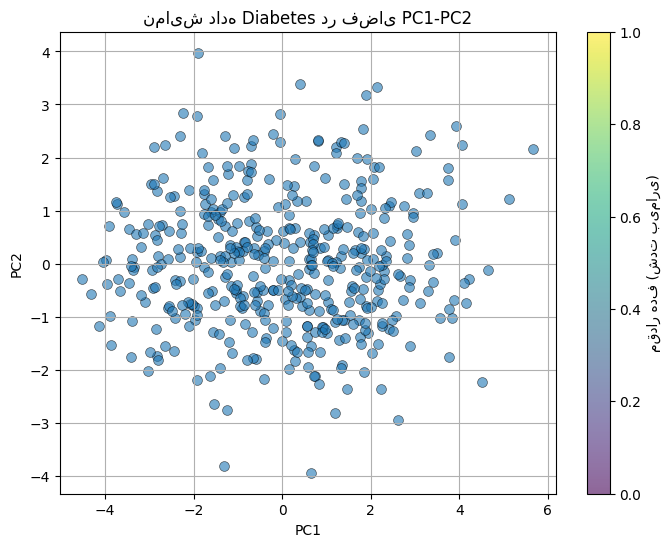


تحلیل بصری نمایش دوبعدی:
- آیا نقاط با شدت بیماری مشابه نزدیک هم قرار دارند؟
- آیا الگوی خطی یا خوشه‌ای مشاهده می‌شود؟
- آیا پراکندگی در یک جهت بیشتر است (مطابق با واریانس بیشتر PC1)؟


In [147]:
# نمایش داده در فضای PC1 و PC2 با رنگ‌بندی براساس مقدار هدف
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
           alpha=0.6, edgecolors='k', linewidth=0.5, s=50)
plt.colorbar(scatter, label='مقدار هدف (شدت بیماری)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('نمایش داده Diabetes در فضای PC1-PC2')
plt.grid(True)
plt.show()


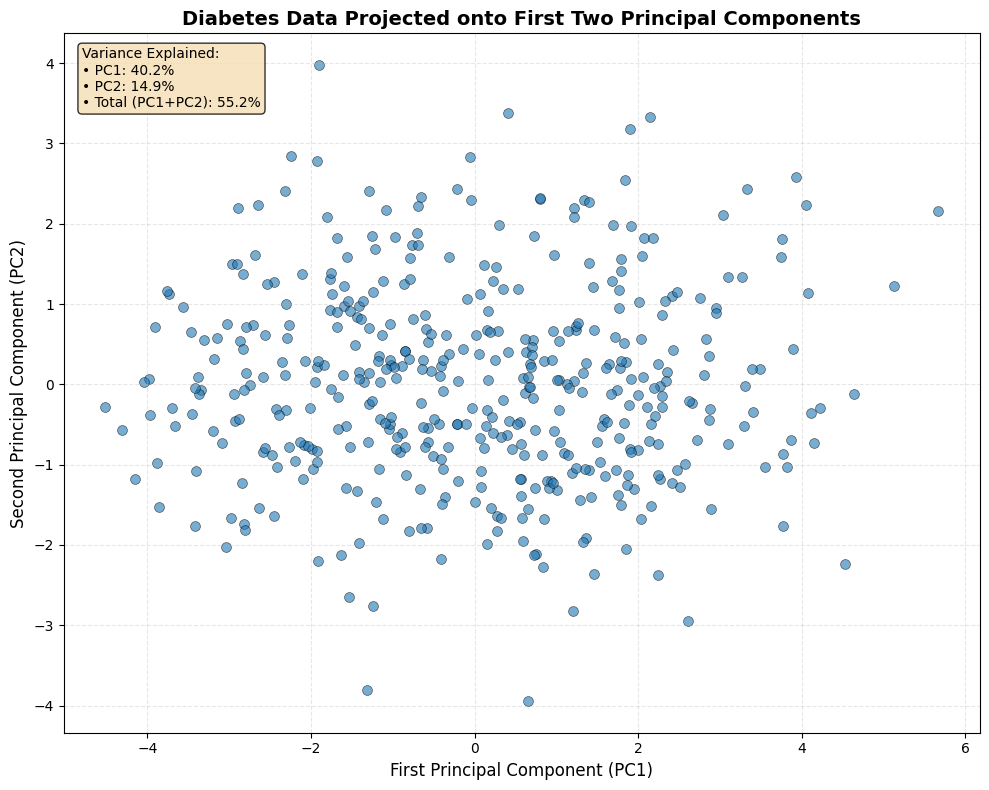


QUALITATIVE ANALYSIS - 2D PCA VISUALIZATION

1. DATA DISTRIBUTION PATTERNS:
------------------------------
• How are the data points distributed in the 2D space?
• Are there any visible clusters or groupings?
• Is the distribution uniform or are there dense regions?

2. SHAPE AND SPREAD:
------------------------------
• Does the cloud of points have a specific shape (ellipsoid, circular, etc.)?
• Is the spread wider along PC1 or PC2?
• Are there any directional patterns?

3. OUTLIERS AND ANOMALIES:
------------------------------
• Are there any points far away from the main cluster?
• How many potential outliers can you identify?

4. INTERPRETATION BASED ON LOADINGS:
------------------------------
Based on loadings from part (c):
• Points on the right (positive PC1) likely have high values in features
  that contribute positively to PC1 (e.g., high BMI, blood sugar)
• Points on the left (negative PC1) likely have low values in those features
• Points at the top (positive PC2) represen

In [149]:
# Part (d): Create 2D visualization without coloring
plt.figure(figsize=(10, 8))

# Simple scatter plot without colors
plt.scatter(X_pca[:, 0], X_pca[:, 1],
           alpha=0.6, edgecolors='k', linewidth=0.5, s=50)

# Labels and title
plt.xlabel('First Principal Component (PC1)', fontsize=12)
plt.ylabel('Second Principal Component (PC2)', fontsize=12)
plt.title('Diabetes Data Projected onto First Two Principal Components',
          fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add variance information
variance_text = f'Variance Explained:\n'
variance_text += f'• PC1: {explained_variance[0]*100:.1f}%\n'
variance_text += f'• PC2: {explained_variance[1]*100:.1f}%\n'
variance_text += f'• Total (PC1+PC2): {(explained_variance[0]+explained_variance[1])*100:.1f}%'

plt.text(0.02, 0.98, variance_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Qualitative analysis
print("\n" + "="*60)
print("QUALITATIVE ANALYSIS - 2D PCA VISUALIZATION")
print("="*60)

print("\n1. DATA DISTRIBUTION PATTERNS:")
print("-" * 30)
print("• How are the data points distributed in the 2D space?")
print("• Are there any visible clusters or groupings?")
print("• Is the distribution uniform or are there dense regions?")

print("\n2. SHAPE AND SPREAD:")
print("-" * 30)
print("• Does the cloud of points have a specific shape (ellipsoid, circular, etc.)?")
print("• Is the spread wider along PC1 or PC2?")
print("• Are there any directional patterns?")

print("\n3. OUTLIERS AND ANOMALIES:")
print("-" * 30)
print("• Are there any points far away from the main cluster?")
print("• How many potential outliers can you identify?")

print("\n4. INTERPRETATION BASED ON LOADINGS:")
print("-" * 30)
print("Based on loadings from part (c):")
print("• Points on the right (positive PC1) likely have high values in features")
print("  that contribute positively to PC1 (e.g., high BMI, blood sugar)")
print("• Points on the left (negative PC1) likely have low values in those features")
print("• Points at the top (positive PC2) represent another pattern from loadings")
print("• Points at the bottom (negative PC2) represent the opposite pattern")

In [146]:
# می‌توان این بخش را به صورت تحلیلی نوشت
print("""
مزایا و معایب استفاده از فضای کاهش‌یافته PCA در مدل یادگیری:

مزایا:
1. کاهش بعد → کاهش پیچیدگی مدل و زمان آموزش.
2. حذف هم‌خطی (multicollinearity) بین ویژگی‌ها.
3. کاهش نویز با حذف مؤلفه‌های کم‌واریانس.
4. جلوگیری از overfitting در صورت انتخاب مناسب تعداد مؤلفه‌ها.

معایب:
1. از دست رفتن تفسیرپذیری — مؤلفه‌های اصلی ترکیبی خطی از همه ویژگی‌ها هستند.
2. ممکن است اطلاعات مهم ولی کم‌واریانس (مثلاً الگوهای غیرخطی) حذف شوند.
3. PCA یک روش بدون نظارت است — ممکن است مؤلفه‌هایی را حفظ کند که برای پیش‌بینی هدف کم‌اهمیت‌اند.
4. حساسیت به استانداردسازی — اگر داده‌ها استاندارد نشوند، مؤلفه‌ها تحت تأثیر مقیاس ویژگی‌ها قرار می‌گیرند.
""")


مزایا و معایب استفاده از فضای کاهش‌یافته PCA در مدل یادگیری:

مزایا:
1. کاهش بعد → کاهش پیچیدگی مدل و زمان آموزش.
2. حذف هم‌خطی (multicollinearity) بین ویژگی‌ها.
3. کاهش نویز با حذف مؤلفه‌های کم‌واریانس.
4. جلوگیری از overfitting در صورت انتخاب مناسب تعداد مؤلفه‌ها.

معایب:
1. از دست رفتن تفسیرپذیری — مؤلفه‌های اصلی ترکیبی خطی از همه ویژگی‌ها هستند.
2. ممکن است اطلاعات مهم ولی کم‌واریانس (مثلاً الگوهای غیرخطی) حذف شوند.
3. PCA یک روش بدون نظارت است — ممکن است مؤلفه‌هایی را حفظ کند که برای پیش‌بینی هدف کم‌اهمیت‌اند.
4. حساسیت به استانداردسازی — اگر داده‌ها استاندارد نشوند، مؤلفه‌ها تحت تأثیر مقیاس ویژگی‌ها قرار می‌گیرند.

